# Showing Picture at Coordinate axis # 

<function matplotlib.pyplot.show(close=None, block=None)>

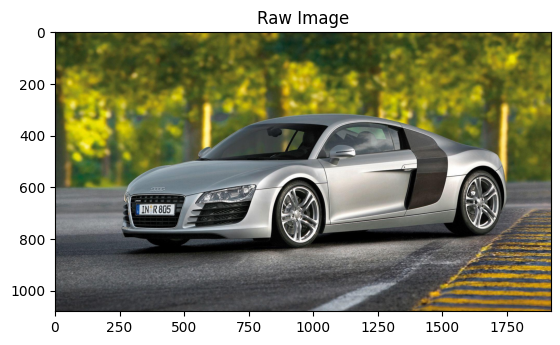

In [4]:
import cv2
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
image = cv2.imread('Car1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Raw Image')
plt.show

# 1. Resizing #
# 2. Cropped #
# 3. Rotated #
# 4. Flipped #

Text(0.5, 1.0, 'Image Flipped')

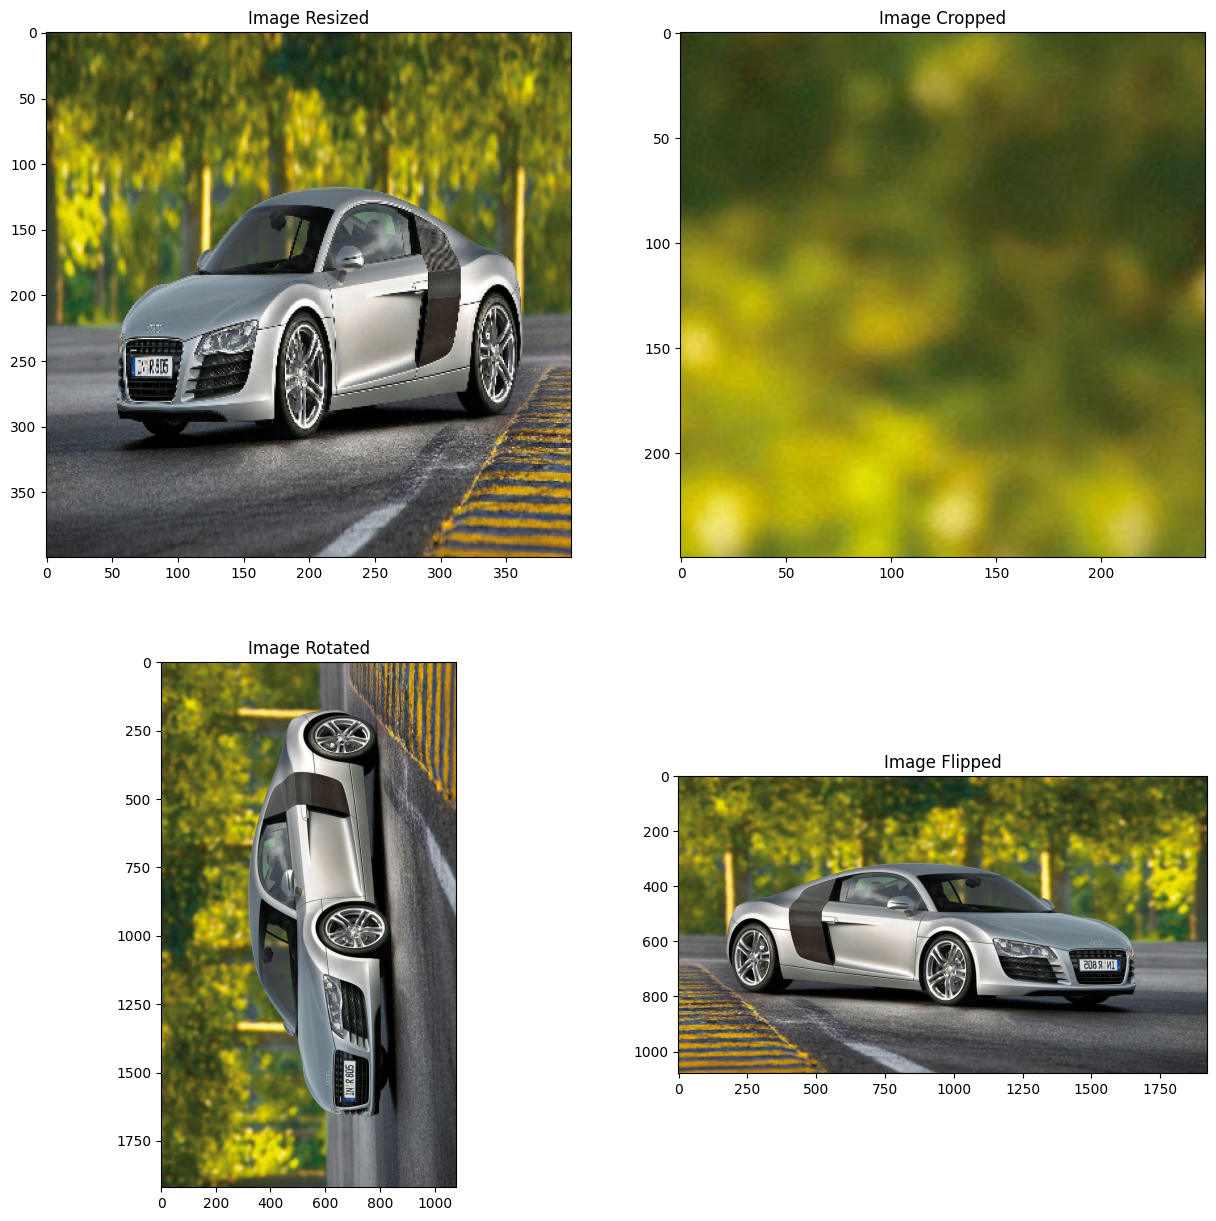

In [14]:
re_sized = cv2.resize(image, (400,400))
fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(re_sized)
axs[0,0].set_title("Image Resized")

cropped_img = image[50:300, 50:300]
axs[0,1].imshow(cropped_img)
axs[0,1].set_title("Image Cropped")

rotated_img = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
axs[1,0].imshow(rotated_img)
axs[1,0].set_title("Image Rotated")

flip_img = cv2.flip(image, 1)
axs[1,1].imshow(flip_img)
axs[1,1].set_title("Image Flipped")

# Drawing on Image #

<function matplotlib.pyplot.show(close=None, block=None)>

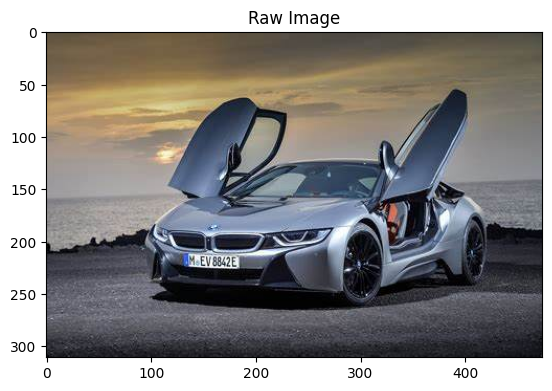

In [15]:
image1 = cv2.imread('Car2.jpeg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

plt.imshow(image1)
plt.title('Raw Image')
plt.show

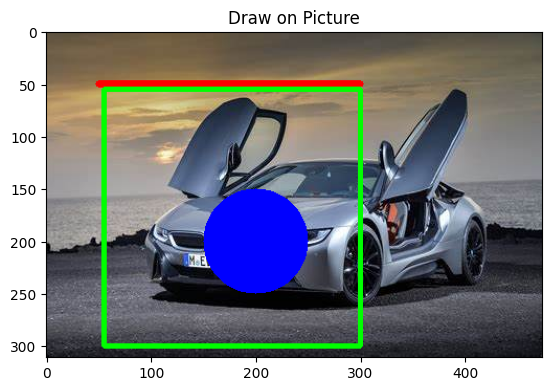

In [16]:
drawing = image1.copy()
cv2.line(drawing, (50,50), (300,50), (305, 0, 0), 5)
cv2.rectangle(drawing, (55,55), (300, 300), (0, 305, 0), 3)
cv2.circle(drawing, (200,200), 50, (0, 0, 305), -1)
cv2.putText(drawing, "Label on Picture", (50, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, (305, 305, 305), 2)

plt.imshow(drawing)
plt.title("Draw on Picture")
plt.show()

# GrayScale Image #
# Binary Thresholding #
# Edges Detection #

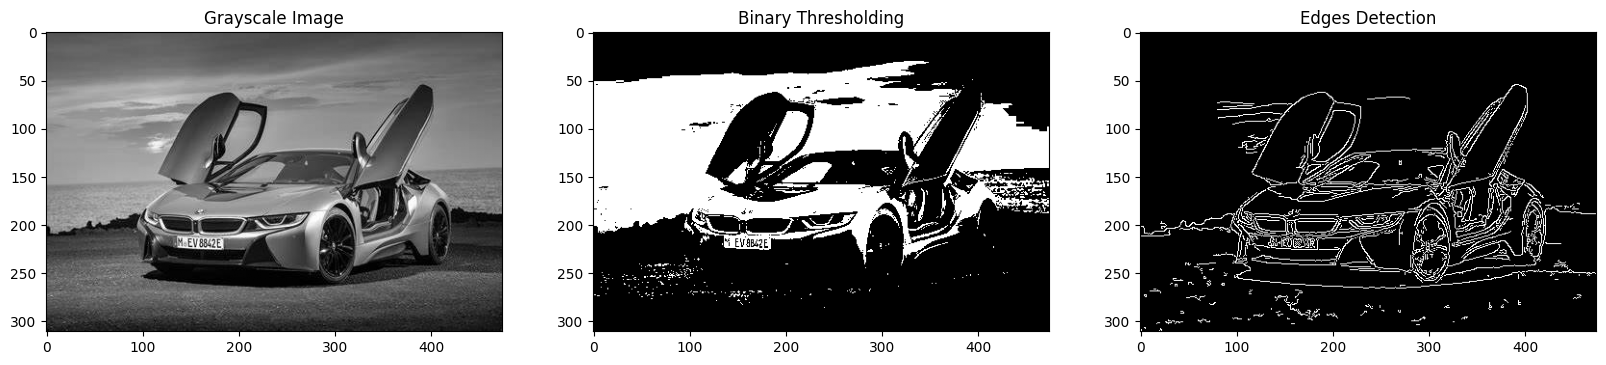

In [21]:
img = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img, 100, 200)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
fig, axs = plt.subplots(1, 3, figsize = (20,8))
axs[1].imshow(binary, cmap= 'gray')
axs[1].set_title("Binary Thresholding")

axs[0].imshow(img, cmap= 'gray')
axs[0].set_title("Grayscale Image")

axs[2].imshow(edges, cmap= 'gray')
axs[2].set_title("Edges Detection")
plt.show()

# Contour Detection #

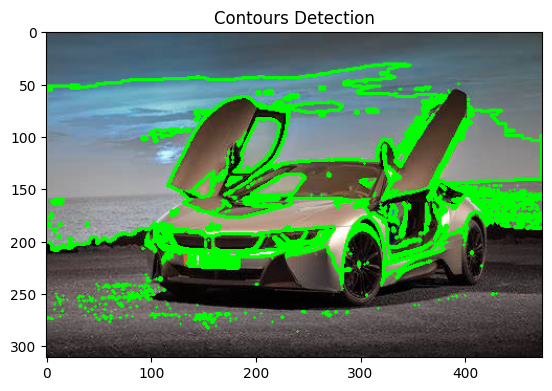

In [22]:
image3 = cv2.imread('Car3.webp')
image3 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image3_copy = image3.copy()
cv2.drawContours(image3_copy, contours, -1, (0, 255, 0), 2)

plt.imshow(image3_copy)
plt.title("Contours Detection")
plt.show()

# Face Detection #

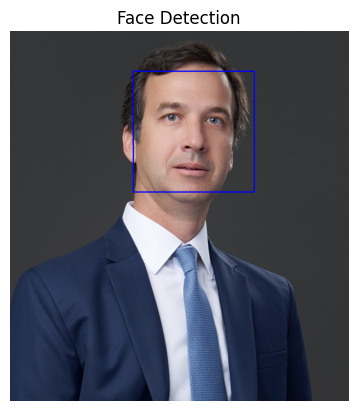

In [29]:

image4 = cv2.imread('Face.jpeg')
image = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = f_cascade.detectMultiScale(image4, 1.1, 4)
face_copy = image4.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(face_copy, (x, y), (x + w, y + h), (255, 0, 0), 2)

face_copy_rgb = cv2.cvtColor(face_copy, cv2.COLOR_BGR2RGB)

plt.imshow(face_copy_rgb)
plt.title("Face Detection")
plt.axis("off")
plt.show()


# Background Subtraction #

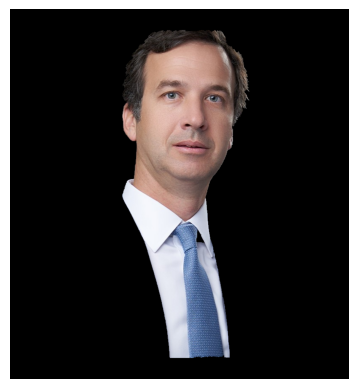

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("Face.jpeg")
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
image_no_bg = image * mask2[:, :, np.newaxis]

plt.imshow(cv2.cvtColor(image_no_bg, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
